<a href="https://colab.research.google.com/github/ijustwanttoputcodehere/Praca_Inz/blob/main/Scotch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importuję potrzebne biblioteki.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WhiskyDB/scotch_review.csv')

In [ ]:
df

,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
...,...,...,...,...,...,...,...
2242,2243,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00,$,"Its best attributes are vanilla, toasted cocon..."
2243,2244,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00,$,"Aged in a sherry cask, which adds sweet notes ..."
2244,2245,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00,$,"Earthy, fleshy notes with brooding grape notes..."
2245,2246,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00,$,"The sherry is very dominant and cloying, which..."


Testuję metodę wydobycia cech z wyizolowanej kolumny z opisem tekstowym.

In [ ]:
import re
pom = df.iloc[:,-1:]
pom_list = pom["description"].tolist() 

In [ ]:
pom_list

In [ ]:
type(pom_list) 

list

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#pom = np.array(pom)
#array_1d = pom.flatten()
#array_1d

array(["Magnificently powerful and intense. Caramels, dried peats, elegant cigar smoke, seeds scraped from vanilla beans, brand new pencils, peppercorn, coriander seeds, and star anise make for a deeply satisfying nosing experience. Silky caramels, bountiful fruits of ripe peach, stewed apple, orange pith, and pervasive smoke with elements of burnt tobacco. An abiding finish of smoke, dry spices, and banoffee pie sweetness. Close to perfection. Editor's Choice",
       "What impresses me most is how this whisky evolves; it's incredibly complex. On the nose and palate, this is a thick, viscous, whisky with notes of sticky toffee, earthy oak, fig cake, roasted nuts, fallen fruit, pancake batter, black cherry, ripe peach, dark chocolate-covered espresso bean, polished leather, tobacco, a hint of wild game, and lingering, leafy damp kiln smoke. Flavors continue on the palate long after swallowing. This is what we all hope for (and dream of) in an older whisky!",
       "There have been som

In [ ]:
#XY = iter(array_1d)

In [ ]:
#XYZ = list(XYZ)

Sprawdzam czy lepiej jest liczyć wystąpienia, czy wystąpienia+ ich waga w w-tekście (tf-idf).

In [ ]:
vectorizer = CountVectorizer(stop_words='english',min_df=4)

vectorizer.fit((pom_list))

vectorizer.get_feature_names()

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',min_df=4)

# Learn vocabulary from sentences. 
vectorizer.fit(pom_list)

# Get vocabularies.
vectorizer.get_feature_names()

In [ ]:
vector = vectorizer.transform(pom_list)
vector_spaces = vector.toarray()

vector_spaces

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(vector_spaces[0][:1000])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [ ]:
vector_spaces.shape

(2247, 2961)

Zależnie czy wczytam df["price"] czy df["review point"] będę trenował model do przewidzenia stosunku ceny do oceny.Ciekawe, że o ile jestem w stanie znaleźć korelację z oceną, w przypadku ceny jest to trudniejsze(Sporo obiektów ma bardzo odbiegającą cenę która parząc na stosunek cena/ocena nie jest uzasadniona.

In [ ]:
pomy = df["price"]

In [ ]:
pomy.shape

(2247,)

In [ ]:
pomy = df['review.point']

In [ ]:
X = np.array(vector_spaces)
y = np.array(pomy)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape[1:]

(2961,)

Próbuję czymś innym, bo sieć jest nieposłuszna.

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

[15:01:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 2.8613416597088035


In [ ]:
y.mean()

86.70004450378282

Koniec sgd

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(240, activation="relu"))
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# applying the scaling to the test set that we computed for the training set
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([ 85, 111,  80, ...,  90, 665, 153])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="Adam",metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_test, y_test))

Epoch 1/100
53/53 [==============================] - 1s 9ms/step - loss: 3.3609 - mae: 1.3791 - val_loss: 14.1692 - val_mae: 2.8583
Epoch 2/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0888 - mae: 0.2193 - val_loss: 14.1106 - val_mae: 2.8678
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0400 - mae: 0.1449 - val_loss: 14.0722 - val_mae: 2.8633
Epoch 4/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0307 - mae: 0.1181 - val_loss: 14.0086 - val_mae: 2.8531
Epoch 5/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0287 - mae: 0.1070 - val_loss: 13.9546 - val_mae: 2.8422
Epoch 6/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0239 - mae: 0.0984 - val_loss: 14.1082 - val_mae: 2.8725
Epoch 7/100
53/53 [==============================] - 0s 5ms/step - loss: 0.0350 - mae: 0.1408 - val_loss: 13.9692 - val_mae: 2.8452
Epoch 8/100
53/53 [==============================] - 0s 4ms/step - loss: 0.0

In [ ]:
import matplotlib.pyplot as plt


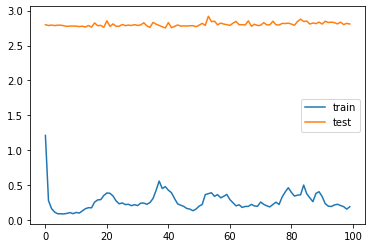

In [ ]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
plt.legend()
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 1ms/step - loss: 173.9520 - mean_squared_error: 173.9520


In [ ]:
mse_test

[173.9520263671875, 173.9520263671875]

Ponizej robiłem obliczenia z wykluczeniem kolumny tekstowej 'description'

In [ ]:
df = df.iloc[:,1:]
df = df.iloc[:,:-2]
df

,name,category,review.point,price
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160
...,...,...,...,...
2242,"Duncan Taylor (distilled at Cameronbridge), Ca...",Grain Scotch Whisky,72,125.00
2243,Distillery Select 'Craiglodge' (distilled at L...,Single Malt Scotch,71,60.00
2244,"Edradour Barolo Finish, 11 year old, 57.1%",Single Malt Scotch,70,80.00
2245,"Highland Park, Cask #7380, 1981 vintage, 25 ye...",Single Malt Scotch,70,225.00


In [ ]:
import re

int_price=[]

# finding out the complications in the column
for i in df['price']:
    #removing $ and , so that we can convert this feature price into integer type
    _=re.sub(r'[$,]+','',i)
    #converting float integrs
    x=re.sub(r'\W\d\d','',_)
    z=0
    #converting liter into one botle price
    if ("/l" in x):
        l=re.sub(r'[/l]\w+','',x)
        
        z=int(l)
        z=z*.75
        int_price.append(z)
        
    # if any of the alphanumeric value like space like we encountered the case : ('$15,000 or $60,000/set')     
    elif(" " in  x):
        l= re.sub(r'[ ]\w+\W+\w+','',x)
        z=int(l)
        int_price.append(z)
            
    elif ("set" in x):
        l=re.sub(r'[/]\w+','',x)
        
        z= int(l)
        z=z/4
        int_price.append(z)
    else :
        z=int(x)
        int_price.append(z)
print(int_price)     

[225, 4500, 13500, 325, 160, 85, 6250, 11000, 1500, 3360, 750, 1500, 3108, 105, 120, 3500, 70, 20000, 70, 15000, 26650, 400, 200, 400, 455, 750, 200, 460, 2525, 1250, 280, 500, 215, 300, 400, 2000, 4000, 225, 60, 180, 300, 3500, 120, 181, 20000, 800, 250, 500, 6000, 30000, 645, 11824, 1250, 550, 700, 140, 400, 700, 387, 5730, 100, 325, 300, 350, 350, 6088, 3500, 112, 109, 130, 100, 120, 1900, 100, 200, 1400, 84, 3000, 225, 164, 50, 150, 140, 175, 1100, 157000, 850, 34, 600, 225, 55, 60, 600, 400, 250, 15000.0, 90, 191, 1925, 2200, 1700, 430, 1100, 150, 300, 135, 250, 3000, 750, 60000, 95, 262, 750, 599, 9420, 600, 2000, 100, 350, 45, 85, 2850, 500, 1000, 150, 100, 1900, 3657, 127, 167, 1200, 525, 280, 3500, 80, 304, 370, 455, 3300, 4000, 3500, 580, 200, 240, 300, 65, 4500, 4000, 170, 60, 300, 248, 2000, 76, 236, 173, 560, 380, 100, 200, 145, 260, 140, 290, 85, 85, 150, 115, 130, 75, 225, 275, 125, 200, 815, 53, 99, 120, 200, 80, 125, 250, 100, 95, 155, 263, 95, 1600, 1722, 1500, 120, 1

In [ ]:
df['price']=int_price
df['price']=df['price'].astype(int)

In [ ]:
df.dtypes

Unnamed: 0       int64
name            object
category        object
review.point     int64
price            int64
currency        object
description     object
dtype: object

In [ ]:
features = ['category', 'price']
X = df[features].copy()
y = df['review.point']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
y

0       97
1       97
2       97
3       96
4       96
        ..
2242    72
2243    71
2244    70
2245    70
2246    63
Name: review.point, Length: 2247, dtype: int64

In [ ]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['category']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
col = 'category'
label_X_train[col] = label_encoder.fit_transform(X_train[col])
label_X_test[col] = label_encoder.transform(X_test[col])

label_X_train


,category,price
1630,4,85
1843,4,111
1516,4,80
61,4,325
1029,4,120
...,...,...
1033,4,68
1731,1,55
763,1,90
835,4,665


In [ ]:
df[col] = label_encoder.fit_transform(df[col])
df.corr()

,category,review.point,price
category,1.000000,-0.067903,-0.001294
review.point,-0.067903,1.000000,0.128042
price,-0.001294,0.128042,1.000000


In [ ]:
label_X_train = np.array(label_X_train)
label_X_test = np.array(label_X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

label_X_train.shape[1:]

(2,)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=label_X_train.shape[1:]),
keras.layers.Dense(1)
])

In [ ]:
y_train

array([84, 83, 85, ..., 89, 88, 84])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="Adam")
history = model.fit(label_X_train, y_train, epochs=30,
validation_data=(label_X_test, y_test))

Epoch 1/30
53/53 [==============================] - 1s 4ms/step - loss: 7729.8898 - val_loss: 22230.4551
Epoch 2/30
53/53 [==============================] - 0s 2ms/step - loss: 7408.0971 - val_loss: 18988.3301
Epoch 3/30
53/53 [==============================] - 0s 2ms/step - loss: 8555.6942 - val_loss: 14017.2422
Epoch 4/30
53/53 [==============================] - 0s 2ms/step - loss: 7413.2972 - val_loss: 7282.2725
Epoch 5/30
53/53 [==============================] - 0s 2ms/step - loss: 8066.9903 - val_loss: 11560.3730
Epoch 6/30
53/53 [==============================] - 0s 2ms/step - loss: 6391.9537 - val_loss: 6990.5996
Epoch 7/30
53/53 [==============================] - 0s 2ms/step - loss: 7014.5820 - val_loss: 14211.0479
Epoch 8/30
53/53 [==============================] - 0s 2ms/step - loss: 6497.8141 - val_loss: 11433.6953
Epoch 9/30
53/53 [==============================] - 0s 2ms/step - loss: 6139.7210 - val_loss: 11857.7578
Epoch 10/30
53/53 [==============================] - 0s 2

In [ ]:
mse_test = model.evaluate(label_X_test, y_test)

18/18 [==============================] - 0s 922us/step - loss: 11402.5352


In [ ]:
X_new = label_X_test[:8] # pretend these are new instances
y_pred = model.predict(X_new)

In [ ]:
y_pred

array([[86.66673],
       [86.66673],
       [86.66673],
       [86.66673],
       [86.66673],
       [86.66673],
       [86.66673],
       [86.66673]], dtype=float32)

In [ ]:
y_test

array([85, 86, 84, 81, 84, 84, 82, 85, 89, 85, 93, 82, 88, 80, 90, 86, 88,
       83, 87, 88, 86, 86, 88, 91, 87, 91, 89, 93, 80, 90, 86, 80, 87, 83,
       90, 88, 88, 88, 90, 89, 80, 96, 94, 90, 85, 90, 89, 93, 79, 83, 84,
       86, 84, 79, 85, 80, 86, 84, 87, 88, 89, 84, 89, 90, 85, 88, 83, 88,
       86, 86, 88, 91, 90, 91, 87, 94, 82, 88, 88, 85, 85, 93, 84, 90, 85,
       93, 81, 89, 80, 83, 90, 82, 86, 88, 89, 90, 89, 89, 93, 93, 89, 90,
       87, 80, 87, 83, 88, 91, 87, 80, 90, 94, 88, 87, 81, 87, 84, 85, 88,
       92, 90, 94, 85, 86, 77, 92, 80, 83, 86, 87, 75, 85, 93, 89, 83, 95,
       90, 84, 86, 74, 86, 88, 78, 87, 85, 86, 89, 92, 91, 84, 90, 86, 90,
       90, 92, 94, 83, 85, 82, 90, 88, 85, 84, 92, 83, 86, 81, 83, 88, 84,
       83, 86, 90, 86, 86, 89, 88, 92, 92, 84, 85, 87, 88, 89, 87, 82, 85,
       95, 90, 82, 89, 81, 81, 90, 87, 86, 73, 85, 88, 84, 93, 92, 84, 81,
       85, 89, 90, 79, 83, 80, 90, 86, 91, 85, 79, 90, 89, 83, 84, 94, 90,
       88, 81, 87, 87, 89

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(label_X_train, y_train)

[15:05:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(label_X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 2.954697972090643


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
X_new

array([[  4, 160],
       [  4,  70],
       [  4,  80],
       [  4,  52],
       [  4,  75],
       [  4, 108],
       [  4,  55],
       [  4,  53]])

In [ ]:
my_model.predict(X_new)

array([86.94333 , 85.41621 , 85.385025, 85.16181 , 85.1069  , 86.08907 ,
       85.16181 , 85.16181 ], dtype=float32)

In [ ]:
y_test[:8]

array([85, 86, 84, 81, 84, 84, 82, 85])